In [105]:
import torch
from  functions import Network, h5ad_Dataset, crossValidation, plot_metrics, crossValidationGrid, testing, create_plot_allperformance, bootstrap, plot_heatmap, save_to_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from  collections import Counter

%load_ext autoreload
%autoreload 2

# I didn't run the models wit the best number of epochs or splits so my laptop could handle it :)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
torch.manual_seed(41) # picking manual seed for optimization 

In [3]:
dataset = h5ad_Dataset('adata_vis_human_spatial_paper.h5ad', 'Niche_NMF') # function in functions which creates dataset

reading in data
filtered
(57787, 4154)
done


<BarContainer object of 8 artists>

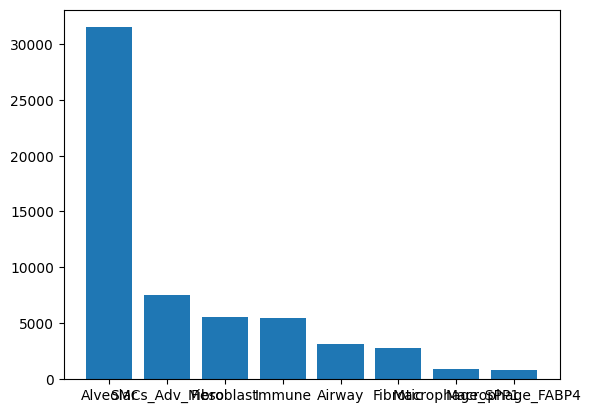

In [4]:
label_counts = dataset.labels.value_counts() # needed just for plotting the label distribution
plt.bar(label_counts.keys(), label_counts)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.counts, dataset.classes,test_size= 0.15, random_state=41, shuffle=True) # split before undersampling -- this way the test set resembles "real world" data 

In [6]:
under = RandomUnderSampler(sampling_strategy = 'all') # undersample all classes to make a balanced training set + otherwise dataset too large to run on my laptop :)
X_under, y_under = under.fit_resample(X_train, y_train)

<BarContainer object of 8 artists>

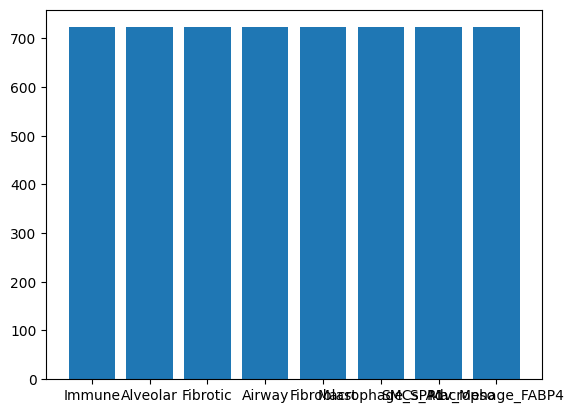

In [8]:
labels_under = [dataset.classes_to_labels[label] for label in y_under] # relevant only for plotting
label_counts = Counter(labels_under)
plt.bar(label_counts.keys(), label_counts.values())

In [101]:
model = Network(X_under.shape[1], 500 , 300, 100, len(dataset.labels_to_classes.keys())) # create model 

In [57]:
n_splits = 3 # determine number of splits (low number so that training does not take too long)

In [81]:
best_model_grid, train_scores_grid, val_scores_grid = crossValidationGrid(n_splits=n_splits, shuffle=True, random_state=41, module=model, 
                             dataset=[X_train, y_train], batch_size=64, epochs=5, labels=list(dataset.labels_to_classes.values())) # performs cross validation using grid search to optimise the learning rate, very low number of epochs otherwise my laptop couldn't handle it

C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.1202       0.8901        0.9113  8.9601
      2        0.7250       0.8989        0.6658  7.6536
      3        0.5230       0.9038        0.4911  7.5420
      4        0.3898       0.9058        0.3870  6.9271
      5        0.3194       0.9072        0.3350  6.7205


C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.1330       0.8946        0.8772  9.5010
      2        0.7443       0.9012        0.6316  8.1465
      3        0.5351       0.9029        0.4624  7.4077
      4        0.3974       0.9061        0.3629  7.0855
      5        0.3250       0.9075        0.3146  6.7410


C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.1167       0.8925        0.8878  9.2376
      2        0.7366       0.9003        0.6592  7.9997
      3        0.5362       0.9017        0.4853  7.1288
      4        0.3952       0.9032        0.3824  6.9681
      5        0.3206       0.9047        0.3314  6.7884


C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.4876       0.8977        0.3153  7.1190
      2        0.2459       0.9017        0.2821  6.5223
      3        0.2309       0.9038        0.2674  6.5414
      4        0.2233       0.9058        0.2591  6.5094
      5        0.2177       0.9075        0.2535  6.5020


C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.4741       0.8836        0.3362  7.1498
      2        0.2483       0.9011        0.2832  6.5095
      3        0.2332       0.9041        0.2717  6.5353
      4        0.2252       0.9050        0.2647  6.5342
      5        0.2195       0.9056        0.2592  6.5037


C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.4763       0.9044        0.2869  7.4477
      2        0.2469       0.9090        0.2598  7.1173
      3        0.2324       0.9107        0.2513  6.8514
      4        0.2243       0.9111        0.2457  6.7860
      5        0.2184       0.9119        0.2419  6.7650


C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.3666       0.8905        0.3171  7.0179
      2        0.2141       0.9085        0.2539  7.1039
      3        0.1866       0.9142        0.2400  7.2552
      4        0.1652       0.9179        0.2331  7.0620
      5        0.1457       0.9186        0.2351  7.0576


C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.3787       0.8882        0.3174  7.3966
      2        0.2159       0.9113        0.2588  6.5344
      3        0.1857       0.9171        0.2496  6.5653
      4        0.1627       0.9192        0.2448  6.6069
      5        0.1417       0.9206        0.2474  6.6056


C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.3708       0.8988        0.3237  7.2873
      2        0.2132       0.9096        0.2573  6.9617
      3        0.1856       0.9165        0.2368  6.9183
      4        0.1637       0.9203        0.2276  7.0532
      5        0.1435       0.9206        0.2337  7.0108


C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Rebeka\anaconda3\envs\masterpraktikum\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        0.3469       0.9165        0.2351  10.9437
      2        0.2033       0.9194        0.2227  10.0939
      3        0.1751       0.9226        0.2177  10.1546
      4        0.1518       0.9248        0.2190  10.2116
      5        0.1293       0.9238        0.2290  10.0469


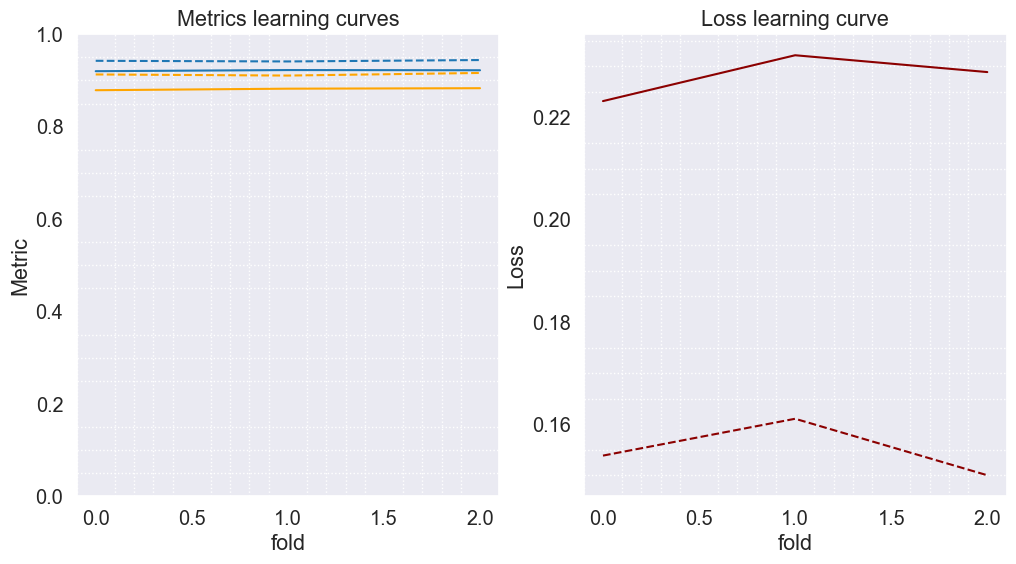

In [115]:
plot_metrics(train_scores_grid[0],val_scores_grid[0], train_scores_grid[1:], val_scores_grid[1:], ['MCC', 'Accuracy'], 'fold', file='performance_plots/grid_training.png') # plotting learning curves to detect overfitting

In [102]:
best_model, train_scores, val_scores = crossValidation(n_splits=n_splits, shuffle=True, random_state=41, model=model, 
                             dataset=[X_under, y_under], batch_size=64, epochs=30, learn_r=0.001) # perform training using the own 

starting cross validation
Fold: 1
Fold 1/3, Epoch 1/30, Loss: 1.697904070869821
Fold 1/3, Validation Loss: 1.5165474376370829
Fold 1/3, Epoch 2/30, Loss: 1.4678530282661564
Fold 1/3, Validation Loss: 1.5216929989476358
Fold 1/3, Epoch 3/30, Loss: 1.443566767895808
Fold 1/3, Validation Loss: 1.4997060798829602
EarlyStopping counter: 1 out of 5
Fold 1/3, Epoch 4/30, Loss: 1.3941988730039754
Fold 1/3, Validation Loss: 1.425804618866213
EarlyStopping counter: 2 out of 5
Fold 1/3, Epoch 5/30, Loss: 1.3503077147436924
Fold 1/3, Validation Loss: 1.4239244960969495
EarlyStopping counter: 3 out of 5
Fold 1/3, Epoch 6/30, Loss: 1.3381893497998598
Fold 1/3, Validation Loss: 1.4207709104784074
EarlyStopping counter: 4 out of 5
Fold 1/3, Epoch 7/30, Loss: 1.3179573348311127
Fold 1/3, Validation Loss: 1.4054368157540598
EarlyStopping counter: 5 out of 5
Early stopping triggered.
Fold: 2
Fold 2/3, Epoch 1/30, Loss: 1.3858728760578594
Fold 2/3, Validation Loss: 1.3717826028023996
Fold 2/3, Epoch 2/30,

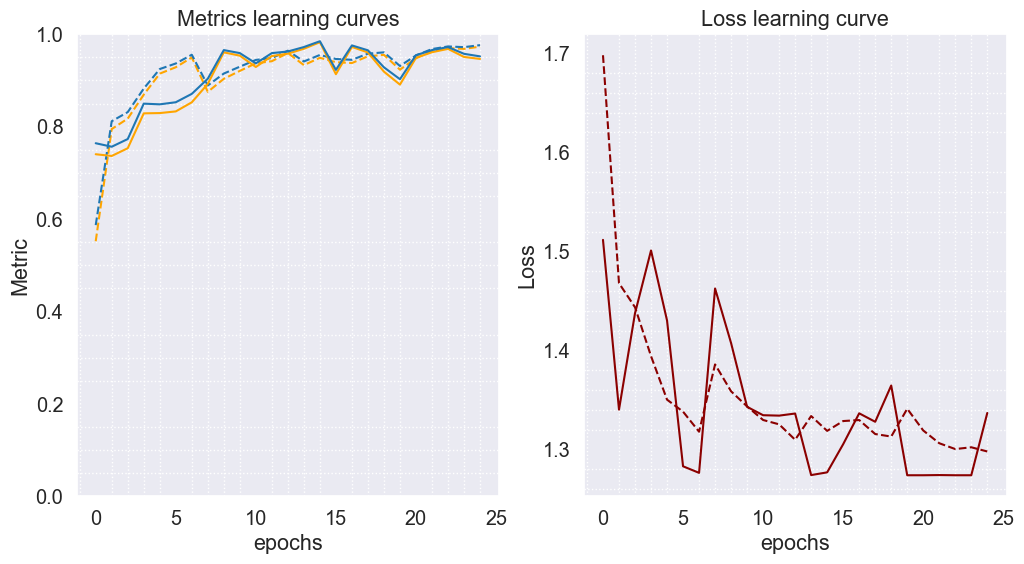

In [116]:
plot_metrics(train_scores[0],val_scores[0], train_scores[1:], val_scores[1:], ['MCC', 'Accuracy'], 'epochs', file='performance_plots/training.png') # learning curves

In [109]:
save_to_file(best_model, 'models/model.pt', grid=False)
save_to_file(best_model_grid, 'models/model_grid.pkl', grid=True)

In [122]:
pred_normal = testing(X_test, model=best_model, grid=False) # prediction of test set with the best model

In [123]:
boot_normal = bootstrap(y_test, pred_normal, n = 1000) # bootstrapping to create confidence intervals

In [124]:
pred_grid = testing(X_test,best_model_grid, True) # same for the grid model

In [129]:
boot_grid = bootstrap(y_test, pred_grid, n=1000)

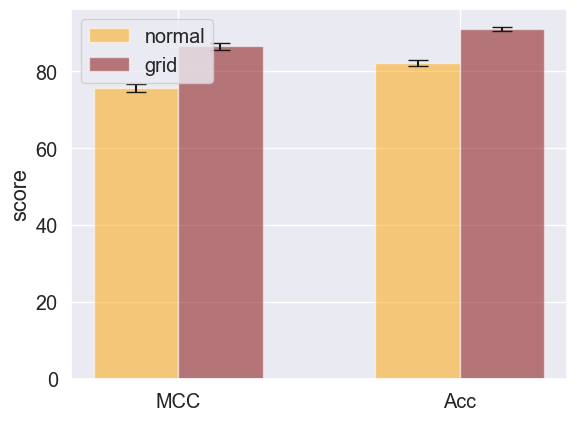

In [130]:
create_plot_allperformance([boot_normal, boot_grid], ['normal', 'grid'], ['orange', 'maroon'], file='performance_plots/performance_comparison.png') # performance comparison on test set

In [131]:
pred_labels = [dataset.classes_to_labels[c] for c in pred_normal.tolist()]
pred_labels_grid = [dataset.classes_to_labels[c] for c in pred_grid.tolist()]
true_test_labels = [dataset.classes_to_labels[c] for c in y_test.tolist()]

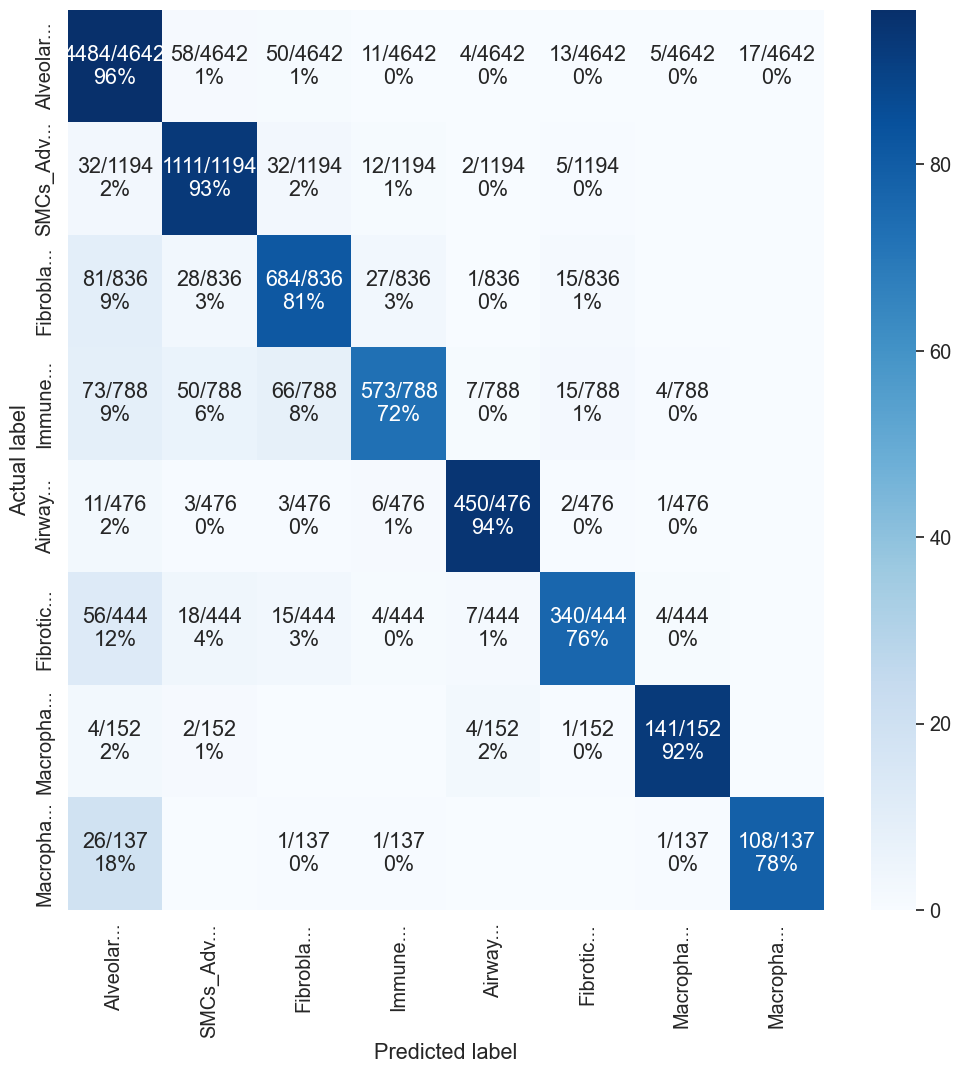

In [136]:
plot_heatmap(true_test_labels, pred_labels_grid, file= 'performance_plots/heat_grid.png')